# feature selection

In [2]:
#data preparation
import pandas as pd
spinels1=pd.read_csv('./data/spinels_ff.csv',index_col=0)
X=spinels1.iloc[:,:-3]
y=spinels1.iloc[:,-3:]
X

,V_a,R_b1,R_b2,A1_v,B1_v,C1_v,D_b,Ve_b,Ve_c,En_b,...,maxdiff_spheat,Comp_L3Norm,fwtmean_enthalpyAtomization,mode_enthalpyAtomization,max_mp,mode_eden,meandiff_NpValence,maxdiff_elaff,min_elaff,maxdiff_zungerad
0,1.0,0.65,0.65,1.0,1.0,1.0,7.44,7.0,6.0,1.55,...,751.0,0.868,237.846,249.0,1246.0,1.37,3.142,141.00,0.00,2.18
1,2.0,0.67,0.67,1.0,1.0,1.0,12.40,9.0,6.0,2.28,...,689.0,0.868,317.211,249.0,1964.0,1.37,3.142,141.00,0.00,2.05
2,2.0,0.80,0.80,1.0,1.0,1.0,7.31,3.0,6.0,1.78,...,686.0,0.868,237.131,249.0,842.0,1.37,2.928,138.63,2.37,2.53
3,4.0,0.69,0.69,1.0,1.0,1.0,8.91,10.0,6.0,1.91,...,474.0,0.868,330.653,249.0,1455.0,1.37,2.857,29.00,112.00,1.71
4,4.0,0.72,0.72,1.0,1.0,1.0,1.74,2.0,6.0,1.31,...,571.0,0.868,243.280,249.0,1538.0,1.37,3.142,141.00,0.00,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2.0,0.87,0.87,1.0,1.0,1.0,6.97,3.0,6.0,1.10,...,866.0,0.868,193.967,227.0,819.0,1.37,3.142,195.00,0.00,2.30
307,2.0,0.62,0.62,1.0,1.0,1.0,7.15,6.0,6.0,1.66,...,247.0,0.868,266.784,197.0,1907.0,1.37,3.142,125.90,64.30,0.77
308,2.0,0.65,0.65,1.0,1.0,1.0,7.44,7.0,6.0,1.55,...,278.0,0.868,211.586,197.0,1246.0,1.37,3.142,190.20,0.00,0.55
309,2.0,0.91,0.91,1.0,1.0,1.0,8.55,3.0,6.0,1.22,...,63.0,0.868,211.443,197.0,1412.0,1.37,3.142,190.20,0.00,2.00


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train_s,y_test_s = train_test_split(X,y,test_size=0.2,shuffle=True)
cate = []
y_train = y_train_s['Eg']
y_test = y_test_s['Eg']
print(X_train.shape)
print(y_test.shape)

(248, 88)
(63,)


In [4]:
# MTGBM training


import math
import lightgbmmt as lgb

import os
from sklearn.metrics import log_loss
from sklearn import preprocessing
import random,math
import pickle
seed = 10
from collections import Counter
from math import log2,log10
from sklearn.model_selection import KFold,TimeSeriesSplit
from sklearn.metrics import roc_auc_score


def entropy(pr):
    total = len(pr)
    pr = Counter(pr)
    log2 = math.log2
    ent = 0
    for i in pr:
        p = float(pr[i]) / total
        ent += (-p) * log2(p)
    return ent
import lightgbmmt as lgb
def metric(true,pred):
    thre = 0.2
    pred = (pred > thre).astype(int)
    p = np.sum(pred*true)/(np.sum(pred) + 0.01)
    r = np.sum(pred*true)/(np.sum(true) + 0.01)
    return p,r,2*p*r/(p+r)


num_label = 3
params = { 'objective': 'custom',
          'num_labels':num_label, 
          'tree_learner': 'serial2',
          'boosting': 'gbdt',
          'verbosity': -1,
          'min_child_weight': 0.1,
          'min_data_in_leaf': 25,
          "num_threads":8,
          'metric_freq':10,
          'data_random_seed': 17,       
          'max_depth': 16,
          'learning_rate': 0.03,
          'bagging_fraction': 0.6313300521833006,
          'feature_fraction': 0.45274262326783216,
          'lambda_l1': 0.3972764452440219,
          'lambda_l2': 1.565487333935478e-05,
           'num_leaves': 168
         }
print(params)
early_stop = 500
verbose_eval = 30
num_rounds = 500

{'objective': 'custom', 'num_labels': 3, 'tree_learner': 'serial2', 'boosting': 'gbdt', 'verbosity': -1, 'min_child_weight': 0.1, 'min_data_in_leaf': 25, 'num_threads': 8, 'metric_freq': 10, 'data_random_seed': 17, 'max_depth': 16, 'learning_rate': 0.03, 'bagging_fraction': 0.6313300521833006, 'feature_fraction': 0.45274262326783216, 'lambda_l1': 0.3972764452440219, 'lambda_l2': 1.565487333935478e-05, 'num_leaves': 168}


In [5]:
folds = 5
kf = KFold(n_splits = folds, shuffle = True, random_state=seed)
def predict(X):
    predictions = model.predict(X)
    return predictions
from shap.explainers import Permutation
explainer = Permutation(predict,X_train, feature_names=X_train.columns)
# evaluation function
def self_metric(preds, train_data):
    labels = train_data.get_label()
    labels2 = labels.reshape((num_label,-1)).transpose()[:,0]
    preds2 = preds.reshape((num_label,-1)).transpose()[:,0]
    preds2 = 1. / (1. + np.exp(-preds2))
    score = roc_auc_score(labels2, preds2)
    return 'self_metric', score, False

# target function
def mymse2(preds, train_data, ep = 0):
    labels = train_data.get_label()
    labels2 = labels.reshape((num_label,-1)).transpose()
    preds2 = preds.reshape((num_label,-1)).transpose()
    labels2 = np.clip(labels2,0,1)
    # Node Splitting and Updating
    preds3 = 1. / (1. + np.exp(-preds2))
    grad2 = preds3 - labels2
    hess2 = grad2 * 0. + 1
    hess2 = preds3 * (1. - preds3)
    #The smaller the correlation between tasks, the larger the gamma (γ), the better the results.
    import random
    beta = max(0.0,0.5 - 0.2 * (ep//100)) * 2
    beta = 0.2
    #A normalization factor (w) is set to weight the losses of all tasks.
    w = np.array([1,0.1 * beta,0.1 * beta])
    w2 = np.array([1.0,1.0,1.0])
    # Increase the weight of Eg
    w = np.array([1,0.1 * beta,2 * beta])
    w2 = np.array([1.0,1.0,2.0])
    grad = (grad2) * np.array(w)
    grad = np.sum(grad,axis = 1)
    grad2 = (grad2 * w2).transpose().reshape((-1))
    # Note: Here, the author applies weighted fusion. The weight setting should align with the magnitude of the numerical objectives to normalize gradients of different objectives to the same scale as much as possible.
    hess = np.sum(hess2 * np.array(w),axis = 1)
    return grad, hess, grad2, hess2

In [7]:
#feature selection through the model performance
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import lightgbmmt as lgb
import pandas as pd

performance_scores = []
feature_subset = []
remaining_features = list(X_train.columns) # Use all column names of X_train
best_score = 0

d_train = lgb.Dataset(X_train, label=y_train.values, categorical_feature=cate)

d_valid = lgb.Dataset(X_test, label=y_test.values, categorical_feature=cate)
early_stopping_rounds = 50

for i in range(len(remaining_features)):
    scores_with_features = []
    # Try adding each remaining feature to see which improves performance the most
    for feature in remaining_features:
        current_features = feature_subset + [feature]
        X_train_subset = X_train[current_features]
        X_test_subset = X_test[current_features]

        # Create datasets only with the current subset of features
        d_train_subset = lgb.Dataset(X_train_subset, label=y_train.values, categorical_feature=cate)
        d_valid_subset = lgb.Dataset(X_test_subset, label=y_test.values, categorical_feature=cate)
        watchlist = [d_valid_subset]

        # Use the subset dataset for training
        model = lgb.train(params,
                          train_set=d_train_subset,
                          valid_sets=watchlist,
                          num_boost_round=num_rounds,
                          verbose_eval=verbose_eval,
                          fobj = mymse2,
                          feval = self_metric)
        model.set_num_labels(num_label)
        
        # Make predictions using the same subset of features used in training
        predictions = model.predict(X_test_subset, num_iteration=model.best_iteration)
        auc_score = roc_auc_score(y_test, predictions)
        scores_with_features.append((auc_score, feature))

    # Find the feature that improved AUC the most
    scores_with_features.sort(reverse=True, key=lambda x: x[0])
    best_feature_auc, best_feature = scores_with_features[0]

    if best_feature_auc > best_score:
        best_score = best_feature_auc
        feature_subset.append(best_feature)
        remaining_features.remove(best_feature)
        performance_scores.append(best_feature_auc)
        print(f"Iteration {i+1}: Added feature '{best_feature}' with AUC {best_feature_auc:.4f}")
    else:
        print("No improvement, stopping...")
        break


(248,)


Using categorical_feature in Dataset.


IndexError: tuple index out of range

In [13]:
#selection results and their scores
data = {
    'Feature Added': feature_subset,
    'AUC Score': performance_scores
}
results_df = pd.DataFrame(data)

print(results_df)

# save to  'feature_selection_results.csv'
results_df.to_csv('feature_selection_results.csv', index=False)

print("Results have been saved to 'feature_selection_results.csv'")


    Feature Added  AUC Score
0    max_htfusion   0.757098
1    LUMO_element   0.810109
2   meandiff_eden   0.855261
3     fwtmean_sgn   0.867077
4              tf   0.873728
5  maxdiff_period   0.890511
Results have been saved to 'feature_selection_results.csv'


In [27]:
feature_subset

['max_htfusion',
 'LUMO_element',
 'meandiff_eden',
 'fwtmean_sgn',
 'tf',
 'maxdiff_period']

In [8]:
# Train the model using the final selected feature set
X_train_final = X_train[feature_subset]
X_test_final = X_test[feature_subset]

d_train_final = lgb.Dataset(X_train_final, label=y_train.values, categorical_feature=cate)
d_valid_final = lgb.Dataset(X_test_final, label=y_test.values, categorical_feature=cate)

model_final = lgb.train(params,
                        train_set=d_train_final,
                        valid_sets=[d_valid_final],
                        num_boost_round=num_rounds,
                        verbose_eval=verbose_eval,
                        fobj=mymse2,
                        feval=self_metric)

# 评估模型性能
predictions_final = model_final.predict(X_test_final, num_iteration=model_final.best_iteration)
final_auc_score = roc_auc_score(y_test, predictions_final)
print(f"Final model AUC: {final_auc_score:.4f}")


[30]	valid_0's self_metric: 0.853469
[60]	valid_0's self_metric: 0.86244
[90]	valid_0's self_metric: 0.864833


Using categorical_feature in Dataset.


[120]	valid_0's self_metric: 0.870813
[150]	valid_0's self_metric: 0.882775
[180]	valid_0's self_metric: 0.883971
[210]	valid_0's self_metric: 0.885167
[240]	valid_0's self_metric: 0.891148
[270]	valid_0's self_metric: 0.893541
[300]	valid_0's self_metric: 0.894737
[330]	valid_0's self_metric: 0.895933
[360]	valid_0's self_metric: 0.898325
[390]	valid_0's self_metric: 0.897129
[420]	valid_0's self_metric: 0.897129
[450]	valid_0's self_metric: 0.900718
[480]	valid_0's self_metric: 0.898325
inner_predict 189
Final model AUC: 0.8905


# shap analysis

In [10]:
import shap  # Ensure SHAP is imported
shap.initjs()  # Initialize JavaScript visualizations
background_data = shap.sample(X_train_final[feature_subset], 100) # Use a smaller sample to speed up the process
# Recreate explainer and calculate shap values
explainer = shap.KernelExplainer(model_final.predict, background_data)
shap_values = explainer.shap_values(X_train_final[feature_subset], nsamples=500)  

inner_predict 300


  0%|          | 0/248 [00:00<?, ?it/s]

inner_predict 3
inner_predict 18600
inner_predict 3


Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.


inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_pr

inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600
inner_predict 3
inner_predict 18600


In [5]:
import lightgbmmt as lgb
import numpy as np
import shap
from shap import KernelExplainer, LinearExplainer
X.columns = X.columns.astype(str)
from sklearn.model_selection import StratifiedKFold
features = [x for x in X.columns ] 
cat_features_idx = [0, 1, 2] 


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test3 = y_test['Eg']

d_train = lgb.Dataset(X_train, label=y_train.values,categorical_feature = cate)
d_valid = lgb.Dataset(X_test, label=y_test.values,categorical_feature = cate)
watchlist = [d_valid]

d_test = lgb.Dataset(X_test, label=y_test3.values,categorical_feature = cate)
watchlist.append(d_test)

model = lgb.train(params,
                  train_set=d_train,
                  num_boost_round=num_rounds,
                  verbose_eval=verbose_eval,
                  fobj = mymse2,
                  feval = self_metric
                 )
model.set_num_labels(num_label)

Using categorical_feature in Dataset.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


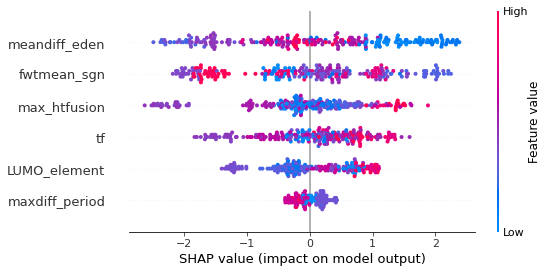

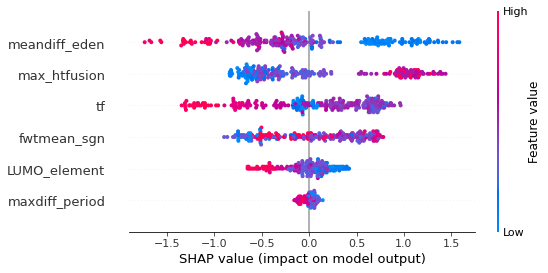

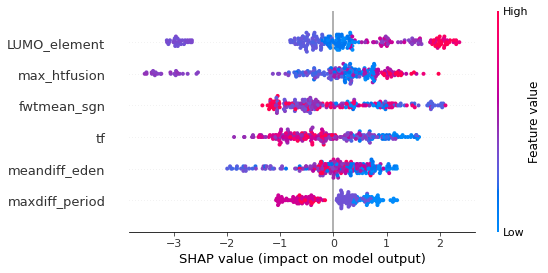

In [12]:
for i in range(len(shap_values)):
    shap.summary_plot(shap_values[i], X_train_final, title=f"Class {i}")



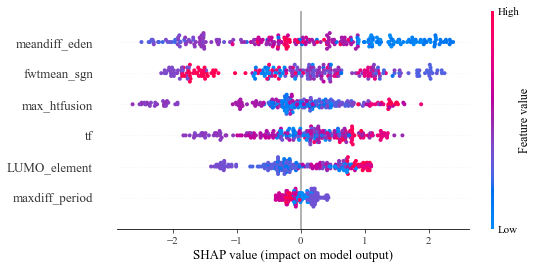

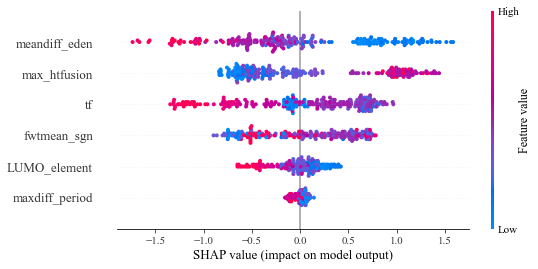

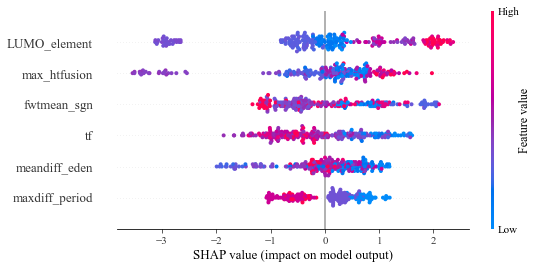

In [18]:
import matplotlib.pyplot as plt
import shap

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  

for i in range(len(shap_values)):
    plt.figure() 
    shap.summary_plot(shap_values[i], X_train_final, show=False, title=f"Class {i}")
    plt.savefig(f"{i}_roc_curve.png", dpi=600)
    plt.show()


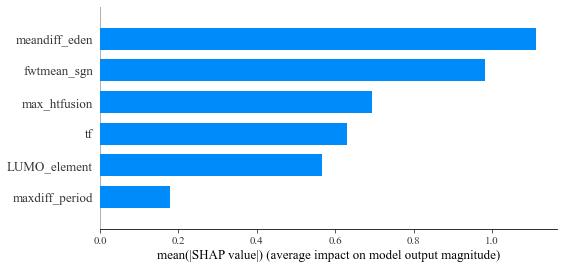

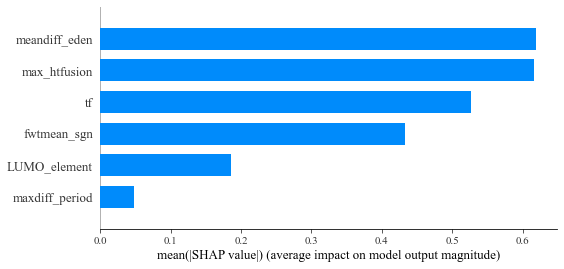

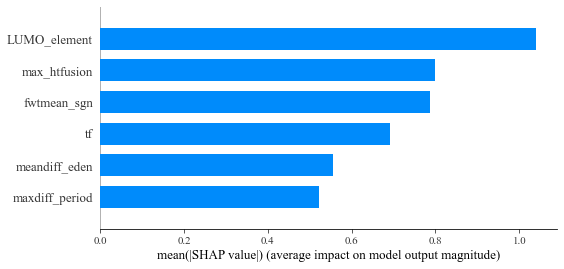

In [19]:
# shap summary plot
for i in range(len(shap_values)):
    plt.figure() 
    shap.summary_plot(shap_values[i], X_train_final, plot_type="bar", title=f"SHAP Bar Plot for Class {i}")
    plt.show()


In [11]:
print(type(shap_values))
if isinstance(shap_values, list):
    print(shap_values[0].shape)  
else:
    print(shap_values.shape)  

<class 'list'>
(248, 88)


In [12]:
# Convert the SHAP values for each class into a single average SHAP value per feature
# First average over the samples (axis=0) for each class, then over the classes (axis=0)
average_shap_values_per_class = [np.mean(np.abs(sv), axis=0) for sv in shap_values]
average_shap_values = np.mean(average_shap_values_per_class, axis=0)

# Verify the dimensions of the resulting average_shap_values
print("Shape of averaged SHAP values:", average_shap_values.shape)

shap_df = pd.DataFrame({
    'Feature': X_train.columns,
    'AvgSHAP': average_shap_values
})

# Check if the DataFrame has been created correctly
print(shap_df.head())
sorted_features = shap_df.sort_values(by='AvgSHAP', ascending=False)['Feature'].tolist()

Shape of averaged SHAP values: (88,)
  Feature   AvgSHAP
0     V_a  0.002874
1    R_b1  0.080856
2    R_b2  0.071103
3    A1_v  0.000000
4    B1_v  0.000000


# model performance vs feature included

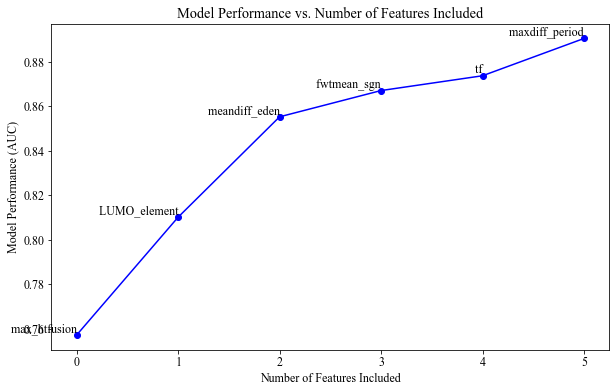

In [22]:
import matplotlib.pyplot as plt
feature_names = ["max_htfusion", "LUMO_element", "meandiff_eden", "fwtmean_sgn", "tf", "maxdiff_period"]

plt.figure(figsize=(10, 6))
plt.plot(range(len(performance_scores)), performance_scores, marker='o', linestyle='-', color='b')
plt.title('Model Performance vs. Number of Features Included')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Performance (AUC)')
plt.grid(False)  

for i, feature_name in enumerate(feature_names):
    plt.text(i, performance_scores[i], f' {feature_name}', verticalalignment='bottom', horizontalalignment='right')

plt.show()


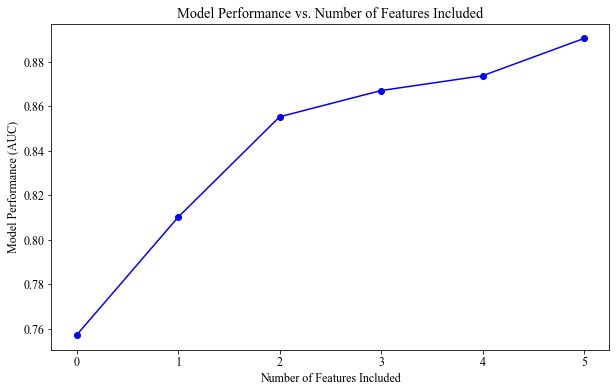

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(performance_scores)), performance_scores, marker='o', linestyle='-', color='b')
plt.title('Model Performance vs. Number of Features Included')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Performance (AUC)')
plt.grid(False)
plt.show()